# fastai v2 Framework 
## Preview version of fastai book 
https://github.com/fastai/fastbook

### Simple example for demostration purposes only

In [1]:
#hide
from utils import *
from fastai2.vision.widgets import *

# Data Sources
## pyimagesearch - Adrian Rosebrock
https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/

50 xray images in covid19 directory

In [2]:
! pwd

/data/home/gaedmon/fastbook/clean


In [3]:
path = 'covid19' 

In [4]:
fns = get_image_files(path)
fns

(#50) [Path('covid19/normal/person612_bacteria_2478.jpeg'),Path('covid19/normal/person1_bacteria_2.jpeg'),Path('covid19/normal/NORMAL2-IM-0869-0001.jpeg'),Path('covid19/normal/person438_bacteria_1893.jpeg'),Path('covid19/normal/person1102_bacteria_3043.jpeg'),Path('covid19/normal/person1290_virus_2215.jpeg'),Path('covid19/normal/person339_bacteria_1574.jpeg'),Path('covid19/normal/person651_bacteria_2543.jpeg'),Path('covid19/normal/NORMAL2-IM-0315-0001.jpeg'),Path('covid19/normal/IM-0466-0001.jpeg')...]

## Define DataBlock

In [4]:
path = Path('covid19')
path

Path('covid19')

In [5]:
covid19 = (
    DataBlock(
        blocks= (ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed = 42),
        get_y=parent_label,
        item_tfms=Resize(128),
    )
)

In [7]:
covid19.summary(path)

Setting-up type transforms pipelines
Found 50 items
2 datasets of sizes 40,10
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      covid19/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
    applying PILBase.create gives
      PILImage mode=RGB size=880x891
  Pipeline: parent_label -> Categorize
    starting from
      covid19/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
    applying parent_label gives
      covid
    applying Categorize gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=880x891, TensorCategory(0))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=880x891, TensorCa

## Dataloaders

### Training Dataset

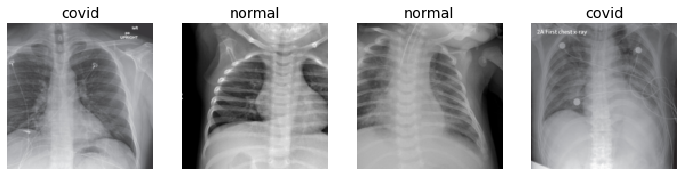

In [11]:
dls = covid19.dataloaders(path,batch_size = 25)
dls.train.show_batch(max_n=4, rows= 1)

### Validation Dataset

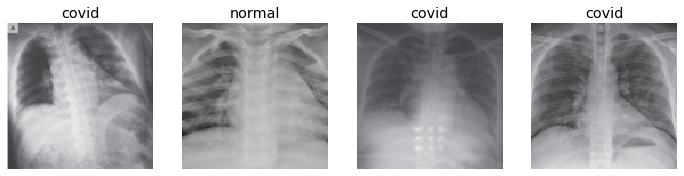

In [12]:
dls.valid.show_batch(max_n=4, rows= 1)

# Learning Rate

### Learning Rate Finder

(0.02089296132326126, 3.019951861915615e-07)

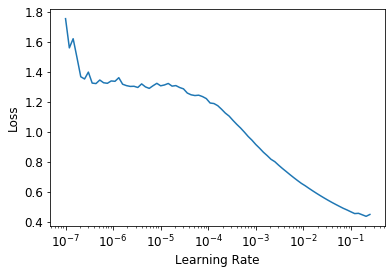

In [14]:
covid19 = (
    DataBlock(
        blocks= (ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed = 42),
        get_y=parent_label,
        item_tfms=Resize(128),
            )
        )

dls = covid19.dataloaders(path,batch_size = 25)

learner = cnn_learner(dls,resnet18,metrics=accuracy)

learner.lr_find()

## Training model

### Create DataBlock, DataLoader, Learner (model+data)

In [45]:
path = Path('covid19')
covid19 = DataBlock(
    blocks = (ImageBlock,CategoryBlock),
    get_items= get_image_files,
    splitter= RandomSplitter(valid_pct=0.3, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [46]:
covid19 = covid19.new(
    item_tfms=RandomResizedCrop(224,min_scale=0.5),
    batch_tfms= aug_transforms()
    )
dls = covid19.dataloaders(path, batch_size=25 )

### Tranfer Learning - Resnet18, 10 epochs

In [48]:
learner = cnn_learner(dls,resnet18,metrics=accuracy)
learner.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.339386,1.329300,0.466667,00:01


epoch,train_loss,valid_loss,accuracy,time
0,1.309856,1.248241,0.400000,00:01
1,1.216607,0.945388,0.466667,00:01
2,1.116840,0.675612,0.666667,00:01
3,0.955577,0.509777,0.733333,00:01
4,0.827502,0.440530,0.800000,00:01
5,0.742642,0.354102,0.800000,00:01
6,0.634905,0.310335,0.866667,00:01
7,0.580204,0.310052,0.866667,00:01
8,0.532924,0.309561,0.866667,00:01
9,0.476891,0.318207,0.866667,00:01


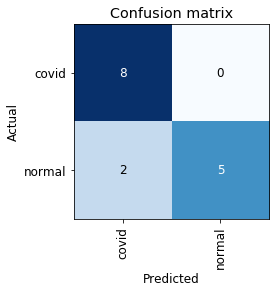

In [49]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

### Train from scratch

In [7]:
path = Path('covid19')
path

Path('covid19')

In [26]:
covid_dbl = (
    DataBlock(
        blocks= (ImageBlock, CategoryBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed = 42),
        get_y=parent_label,
        item_tfms=Resize(460),
        batch_tfms=aug_transforms(size=224, min_scale=0.75)
    )
)

In [27]:
covid_dls = covid_dbl.dataloaders(path, batch_size= 40 )

In [31]:

covid_learner = cnn_learner(covid_dls, resnet50, metrics=accuracy)
covid_learner.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.946501,0.487252,0.800000,00:02
1,0.955659,0.032380,1.000000,00:02
2,0.664423,0.001529,1.000000,00:02
3,0.509623,0.000242,1.000000,00:02
4,0.411622,0.000118,1.000000,00:02


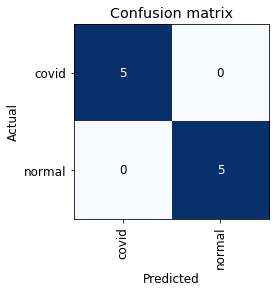

In [32]:
interp = ClassificationInterpretation.from_learner(covid_learner)
interp.plot_confusion_matrix()

### Top Loses

- Need more data
- train from scratch?

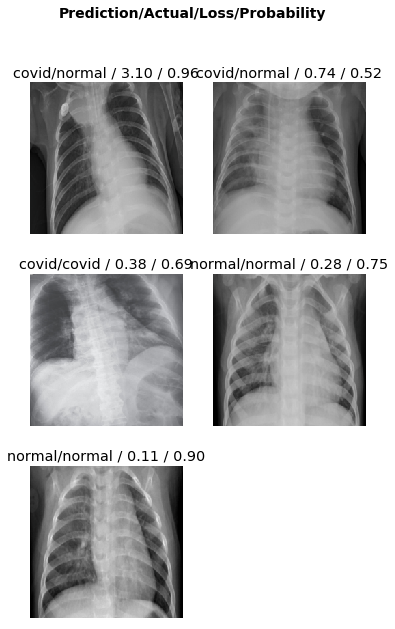

In [50]:
interp.plot_top_losses(5)